In [14]:
import pandas as pd
import numpy as np
import sklearn as sk
import openpyxl
import statsmodels.graphics.api as smg
import matplotlib.pyplot as plt 
import seaborn as sns
import shap
from sklearn.ensemble import RandomForestRegressor
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge
from sklearn.model_selection import ShuffleSplit
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn import svm
import warnings
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits

In [15]:
datos = pd.read_excel('/home/erick_castro/Documentos/Inteligencia/Datos.xlsx', sheet_name = "Hoja1")
datos = pd.DataFrame(datos)
datos = datos.dropna(axis = 0, how ="any")
datos.head(10)

,Evento,A1,D1,AI1,MI1,CI1,A2,D2,AI2,MI2,...,SM40,SM60,SM80,SM100,24PA1,24PA2,48PA1,48PA2,MAXD,INITIALQ
0,Evento 1,16.382445,55,17.871758,399.148547,27.132184,12.66,55,13.810909,93.850000,...,0.490273,0.519179,0.535343,0.503777,16.382445,13.0,19.460113,13.4,17.246332,6.854821
1,Evento 2,15.827108,35,27.132184,312.330000,27.132184,14.80,40,22.200000,84.375000,...,0.495030,0.524897,0.540182,0.506062,56.089048,50.2,56.089048,50.2,20.280403,7.080917
2,Evento 3,54.700705,1125,2.917371,138.830000,11.285883,47.00,1125,2.506667,109.375000,...,0.505497,0.537286,0.552282,0.514057,56.089048,50.2,56.089048,50.2,30.667560,7.092906
3,Evento 4,13.883428,105,7.933387,86.771423,7.933387,12.40,95,7.831579,28.125000,...,0.515011,0.553487,0.572852,0.534618,1.000000,1.0,1.000000,1.0,15.663358,9.328517
4,Evento 5,5.553371,60,5.553371,104.125708,8.554286,5.00,50,6.000000,21.875000,...,0.545459,0.576360,0.598261,0.557462,23.324159,18.2,60.809413,50.8,16.910000,13.085455
5,Evento 6,24.434833,340,4.312029,173.542846,15.202500,23.40,400,3.510000,44.791667,...,0.520720,0.559205,0.581322,0.542613,3.332023,2.8,3.332023,2.8,23.893522,11.809956
6,Evento 7,3.054354,55,3.332023,69.417139,6.000000,2.80,65,2.584615,11.458333,...,0.535944,0.576360,0.598261,0.550609,26.656181,24.2,29.988204,27.0,14.280000,12.886883
7,Evento 8,19.436799,85,13.720093,312.370000,27.600000,15.40,45,20.533333,66.666650,...,0.528332,0.568736,0.594631,0.551751,20.269804,19.2,46.925986,43.4,36.390000,13.014717
8,Evento 9,5.275703,25,12.661686,69.417139,12.661686,5.00,35,8.571429,25.000000,...,0.537847,0.578266,0.600681,0.560889,9.718399,9.0,29.988204,28.2,16.530000,13.709470
9,Evento 10,3.609691,50,4.331629,34.708569,4.980000,3.40,65,3.138462,8.333333,...,0.541653,0.579219,0.601891,0.560889,9.718399,9.0,29.988204,28.2,17.006422,14.355421


In [16]:
MAXD = datos[['MAXD']]
Expl= pd.DataFrame(datos[['A2', '48PA2']])

In [17]:
train_sizes = [10, 50, 70, 90, 100,125,150,170,190,196]

In [18]:
features = ['A2', '48PA2']
target = 'MAXD'
train_sizes, train_scores, validation_scores = learning_curve(
estimator = svm.SVR(kernel='linear', cache_size=400),
X = datos[features],
y = datos[target], train_sizes = train_sizes, cv = 10,
scoring = 'neg_mean_squared_error')

In [19]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[ -32.63814497  -28.73322933  -28.73322933  -28.73322933  -28.73322933
   -28.73322933  -28.73322933  -28.73322933  -28.73322933  -28.73322933]
 [ -52.08258143  -34.6836426   -87.08153677  -83.46289533  -83.46289533
   -83.46289533  -83.46289533  -83.46289533  -83.46289533  -83.46289533]
 [ -47.78583785  -34.55879561  -71.09760806  -63.38750062  -63.89369808
   -63.89369808  -63.89369808  -63.89369808  -63.89369808  -63.89369808]
 [-108.68419475 -103.52360995 -128.02113416 -117.74655012  -59.45185735
   -56.80489342  -56.80489342  -56.80489342  -56.80489342  -56.80489342]
 [-107.20684688 -105.42599513 -123.80967983 -115.80357117  -65.08924766
   -65.71734457  -65.71734457  -65.71734457  -65.71734457  -65.71734457]
 [-285.52876641 -316.01624376 -314.99431794 -286.66929012 -255.29063692
  -103.51863872 -104.70296001 -104.70296001 -104.70296001 -104.70296001]
 [-267.84150672 -289.73090449 -295.45713335 -258.38230151 -259.75405253
   -99.4416108  -277.05977749 -255.3114

In [20]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 10      29.123721
50      75.808803
70      60.019193
90      80.145181
100     84.592206
125    198.082973
150    251.360175
170    231.339488
190    235.212971
196    271.038123
dtype: float64

 --------------------

Mean validation scores

 10     732.877032
50     320.311171
70     310.590059
90     311.833258
100    325.359937
125    306.119591
150    298.627765
170    296.426239
190    294.828425
196    293.170187
dtype: float64


The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


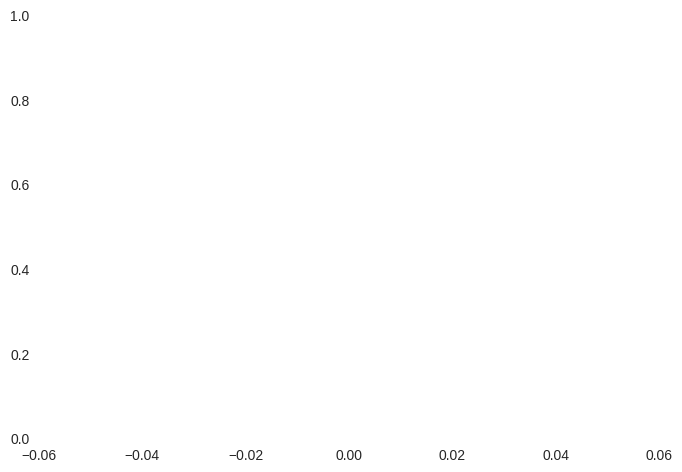

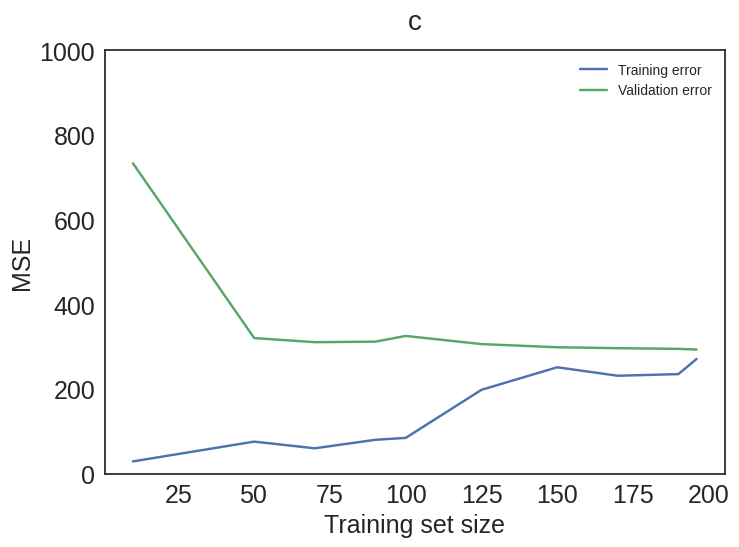

In [23]:
plt.style.use('seaborn')
ax = plt.axes()
ax.set_facecolor("white")
ax.set_xmargin(0.1)
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig, ax = plt.subplots()
plt.grid(b=False, which='major')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 18)
plt.xlabel('Training set size', fontsize = 18)
plt.title('c', fontsize = 20, y = 1.03)
plt.legend()
plt.ylim(0,1000)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.savefig("learning_curve_SVM_normal_.jpg", dpi = 500)

/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed w

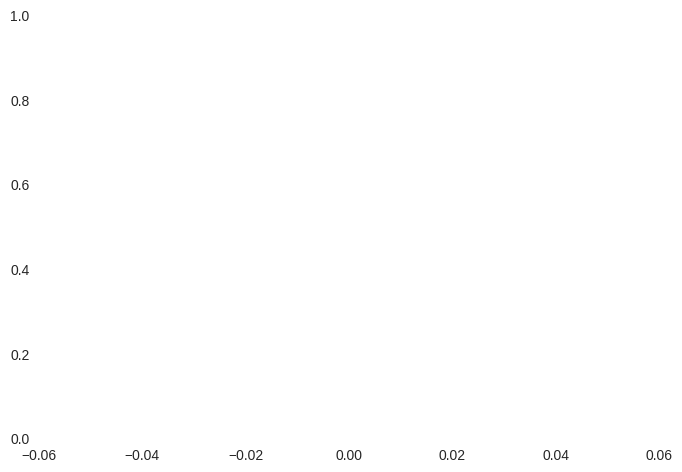

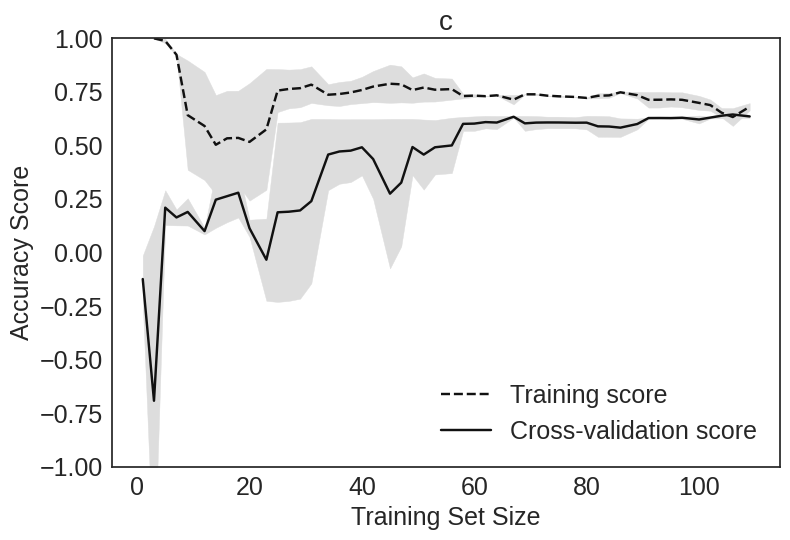

In [24]:
train_sizes, train_scores, test_scores = learning_curve(svm.SVR(kernel='linear', cache_size=400), Expl , MAXD,cv=2, scoring='r2', n_jobs=-1,train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.style.use('seaborn')
ax = plt.axes()
ax.set_facecolor("white")
ax.set_xmargin(0.1)
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig, ax = plt.subplots()
plt.grid(b=False, which='major')

plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("c", fontsize = 20)
plt.xlabel("Training Set Size", fontsize = 18), plt.ylabel("Accuracy Score", fontsize = 18), plt.legend(loc="best", fontsize = 18)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.legend(fontsize = 18)
plt.ylim(-1, 1)
plt.tight_layout()
plt.savefig("bias_variance_SVM_normal.jpg", dpi = 500)

In [25]:
kfold = ShuffleSplit(n_splits=30, test_size=0.3, random_state=1)
model = svm.SVR(kernel='linear', cache_size=400)
results = cross_val_score(model, Expl ,MAXD, cv=kfold, scoring='r2')
print(results)
print(results.mean())
print(results.std())

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

[0.75100294 0.65339828 0.77938743 0.79076262 0.70103625 0.6350954
 0.63852523 0.61306825 0.72981562 0.69119984 0.62011449 0.64926319
 0.67647291 0.60280635 0.66976401 0.61239616 0.68028223 0.72483285
 0.73754678 0.66173842 0.53688022 0.57051053 0.58414067 0.51453653
 0.61575008 0.74023837 0.70122973 0.73005462 0.62105278 0.79521193]
0.6676038230603967
0.07115329001336249


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

In [26]:
X_train,X_test, y_train,y_test = train_test_split(Expl,MAXD, random_state=1)
lr=svm.SVR(kernel='linear', cache_size=400)
lr.fit(X_train, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


SVR(cache_size=400, kernel='linear')

In [27]:
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
print('Train score:', train_score)
print('Test score:', test_score)

Train score: 0.6698355990813114
Test score: 0.753290958206289
